In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight




# Load data

In [3]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/DSA4263/insurance_claims.csv'

df_original = pd.read_csv(file_path)

df = df_original.copy()

# Viewing of Data
#df.head()
display(df)



#file_url = "https://github.com/dths8/DSA4263_Vehicle-Insurance-Fraud-Detection/blob/main/data/insurance_claims.csv"

#df = pd.read_csv(file_url)


Mounted at /content/drive


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Data cleaning

_c39                     1000
authorities_contacted      91
months_as_customer          0
age                         0
policy_state                0
policy_csl                  0
policy_number               0
policy_bind_date            0
policy_annual_premium       0
policy_deductable           0
dtype: int64
months_as_customer       0
age                      0
policy_bind_date         0
policy_state             0
policy_csl               0
policy_deductable        0
policy_annual_premium    0
umbrella_limit           0
insured_zip              0
insured_sex              0
dtype: int64

policy_state:
['OH' 'IN' 'IL']

insured_occupation:
['Manual' 'Sales/Service' 'Technical' 'Professional']

insured_hobbies:
['Leisure' 'Games' 'Extreme' 'Sports' 'Outdoor']

insured_relationship:
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type:
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type:
['Side Collis

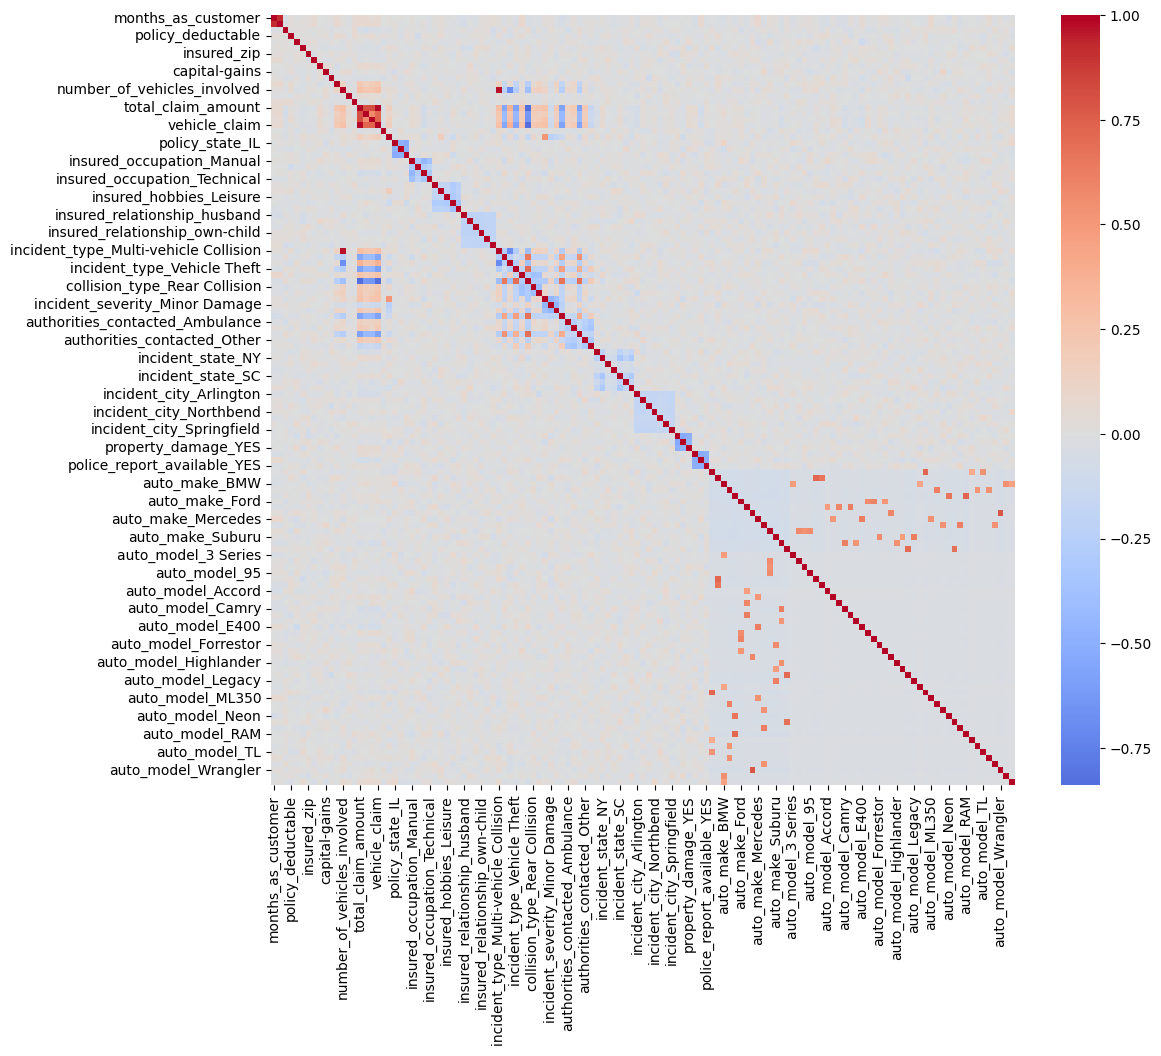

Highly correlated feature pairs:
                         Feature1                               Feature2  \
1817           total_claim_amount                          vehicle_claim   
1496  number_of_vehicles_involved  incident_type_Multi-vehicle Collision   
0              months_as_customer                                    age   

      Correlation  
1817     0.982773  
1496     0.970146  
0        0.922098  


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,capital-gains,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1,1000,1406.91,0,466132,1,4,53300,...,False,False,False,False,False,False,False,False,False,False
1,228,42,1,2000,1197.22,5000000,468176,1,4,0,...,False,False,False,False,False,False,False,False,False,False
2,134,29,0,2000,1413.14,5000000,430632,0,6,35100,...,False,True,False,False,False,False,False,False,False,False
3,256,41,1,2000,1415.74,6000000,608117,0,6,48900,...,False,False,False,False,False,True,False,False,False,False
4,228,44,2,1000,1583.91,6000000,610706,1,0,66000,...,False,False,True,False,False,False,False,False,False,False


In [4]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

#remove c39 & policy num col, redundant column
df = df.drop('_c39', axis=1)
df = df.drop('policy_number', axis=1)



# take missing values as authorities not contacted
df['authorities_contacted'] = df['authorities_contacted'].fillna('None')
print(df.isnull().sum().sort_values(ascending=False).head(10))

# encode target var
df['fraud_reported'].unique()
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})




#cols not to be encoded
columns_to_drop = ['policy_bind_date', 'incident_date', 'incident_location']
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)


date_columns = ['policy_bind_date', 'incident_date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_dayofweek'] = df[col].dt.dayofweek
        print(f"Converted {col} to datetime features")
        df = df.drop(col, axis=1)


df.replace('?', pd.NA, inplace=True)



#create binning for occupation and hobbies to reduce cols
occupation_mapping = {
    'craft-repair': 'Manual',
    'machine-op-inspct': 'Manual',
    'handlers-cleaners': 'Manual',
    'transport-moving': 'Manual',
    'farming-fishing': 'Manual',

    'sales': 'Sales/Service',
    'adm-clerical': 'Sales/Service',
    'other-service': 'Sales/Service',
    'priv-house-serv': 'Sales/Service',

    'exec-managerial': 'Professional',
    'prof-specialty': 'Professional',

    'tech-support': 'Technical',
    'protective-serv': 'Technical',
    'armed-forces': 'Technical'
}

df['insured_occupation'] = df['insured_occupation'].map(occupation_mapping)



hobbies_mapping = {
    'sleeping': 'Leisure',
    'reading': 'Leisure',
    'movies': 'Leisure',

    'board-games': 'Games',
    'chess': 'Games',
    'video-games': 'Games',

    'bungie-jumping': 'Extreme',
    'base-jumping': 'Extreme',
    'skydiving': 'Extreme',

    'golf': 'Sports',
    'basketball': 'Sports',
    'polo': 'Sports',
    'cross-fit': 'Sports',
    'exercise': 'Sports',

    'camping': 'Outdoor',
    'hiking': 'Outdoor',
    'yachting': 'Outdoor',
    'paintball': 'Outdoor',
    'kayaking': 'Outdoor',
    'dancing': 'Outdoor'
}

df['insured_hobbies'] = df['insured_hobbies'].map(hobbies_mapping)









#cols to be one-hot encoded
one_hot_features = ['policy_state', 'insured_occupation', 'insured_hobbies',
                    'insured_relationship','incident_type', 'collision_type',
                    'incident_severity', 'authorities_contacted', 'incident_state',
                    'incident_city', 'property_damage', 'police_report_available',
                    'auto_make', 'auto_model']

#cols to be label encoded
label_encode_features = ['policy_csl', 'insured_sex', 'insured_education_level']

# fill missing
df[one_hot_features] = df[one_hot_features].fillna('Missing')
df[label_encode_features] = df[label_encode_features].fillna('Missing')


#for sanity check of encoding cols
for col in one_hot_features + label_encode_features:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].unique())



# one-hot encode
df = pd.get_dummies(df, columns=one_hot_features, drop_first=False)

#label encode
label_mappings = {}
for col in label_encode_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    mapping = {k: int(v) for k, v in zip(le.classes_, le.transform(le.classes_))}
    label_mappings[col] = mapping
    print(f"Label mapping for {col}: {mapping}\n")




# check if encoding is correct
print(df.columns.tolist())



#check for dupes
print("Duplicate rows:", df.duplicated().sum())



import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()


corr_matrix = df.corr().abs()

# upper triangle only
upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
corr_pairs = pd.DataFrame(
    [(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.values[i,j])
     for i in range(corr_matrix.shape[0])
     for j in range(corr_matrix.shape[1])
     if upper[i,j]],
    columns=['Feature1', 'Feature2', 'Correlation']
)

#filter pairs with corr above threshold 0.85
high_corr_pairs = corr_pairs[corr_pairs['Correlation'] > 0.85].sort_values(by='Correlation', ascending=False)

print("Highly correlated feature pairs:")
print(high_corr_pairs)


df = df.drop(['vehicle_claim', 'incident_type_Multi-vehicle Collision'], axis=1)

df.head()



In [5]:
#scale numeric var
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# exclude target and label encoded cols
exclude_cols = ['fraud_reported'] + label_encode_features + [
    'policy_bind_date_year', 'policy_bind_date_month', 'policy_bind_date_day', 'policy_bind_date_dayofweek',
    'incident_date_year', 'incident_date_month', 'incident_date_day', 'incident_date_dayofweek',
    'incident_hour_of_the_day'
]
numeric_features_to_scale = [col for col in numeric_features if col not in exclude_cols]

scaler = StandardScaler()
df[numeric_features_to_scale] = scaler.fit_transform(df[numeric_features_to_scale])

pd.set_option('display.max_columns', None)

print(df.isnull().sum().sum()) #should get 0

df.head()

0


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_year,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,insured_occupation_Manual,insured_occupation_Professional,insured_occupation_Sales/Service,insured_occupation_Technical,insured_hobbies_Extreme,insured_hobbies_Games,insured_hobbies_Leisure,insured_hobbies_Outdoor,insured_hobbies_Sports,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Missing,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_Missing,property_damage_NO,property_damage_YES,police_report_available_Missing,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1.078140,0.990836,1,-0.222383,0.616705,-0.479476,-0.489529,1,4,1.011331,0.953851,5,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,-0.183440,1,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.208995,0.334073,1,1.412784,-0.242521,1.697980,-0.461008,1,4,-0.901927,0.953851,8,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,0.315491,1,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

# EDA (Before SMOTE)

fraud_reported
0    753
1    247
Name: count, dtype: int64
fraud_reported
0    0.753
1    0.247
Name: proportion, dtype: float64


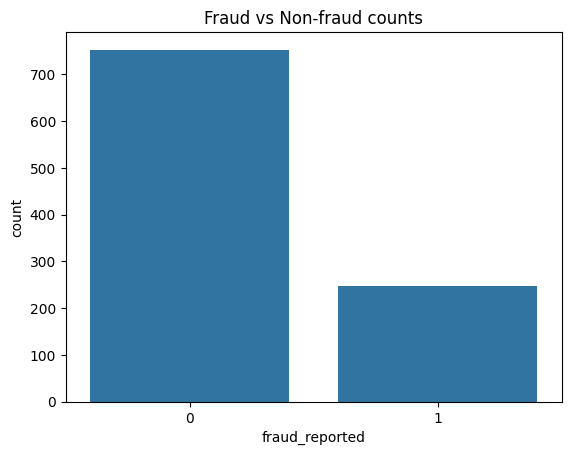

In [6]:
print(df['fraud_reported'].value_counts())
print(df['fraud_reported'].value_counts(normalize=True))

sns.countplot(data=df, x='fraud_reported')
plt.title("Fraud vs Non-fraud counts")
plt.show()


In [7]:
#split into train test set
x_train, x_test, y_train, y_test = train_test_split(df.drop('fraud_reported', axis=1), df['fraud_reported'], test_size=0.2, random_state=4263)



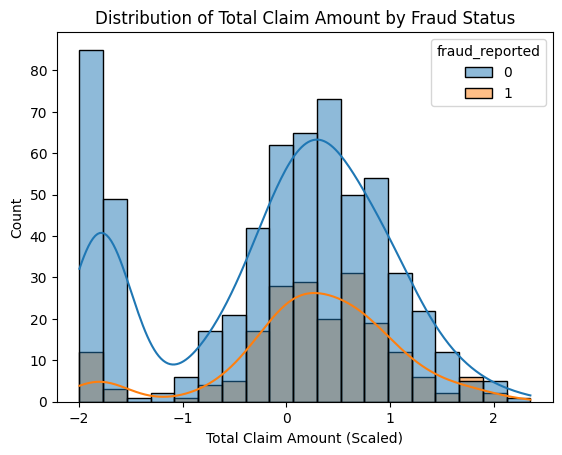

In [8]:
#plot distribution curves for total_claim_amount for fraud and non-fraud cases
sns.histplot(x=x_train['total_claim_amount'], hue=y_train, kde=True)
plt.title("Distribution of Total Claim Amount by Fraud Status")
plt.xlabel("Total Claim Amount (Scaled)")
plt.ylabel("Count")
plt.show()

In [9]:
#find the number of fraud cases in each bin of total_claim_amount
lower_bound = -2
upper_bound = -1
print("Number of fraud cases for each bin of total_claim_amount")
for lower_bound in range(-2, 3):
  fraud_in_bin = pd.DataFrame()
  #join xtrain and ytrain dataset together for this analysis
  fraud_in_bin['total_claim_amount'] = x_train['total_claim_amount']
  fraud_in_bin['fraud_reported'] = y_train
  fraud_in_bin = fraud_in_bin[(fraud_in_bin['total_claim_amount'] > lower_bound) &
                    (fraud_in_bin['total_claim_amount'] < upper_bound)]
  print("--------------------------------------")
  print(fraud_in_bin['fraud_reported'].value_counts())
  print(fraud_in_bin['fraud_reported'].value_counts(normalize=True))
  upper_bound += 1


#print(fraud_in_bin['fraud_reported'].value_counts())
#print(fraud_in_bin['fraud_reported'].value_counts(normalize=True))



Number of fraud cases for each bin of total_claim_amount
--------------------------------------
fraud_reported
0    137
1     16
Name: count, dtype: int64
fraud_reported
0    0.895425
1    0.104575
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    127
1     39
Name: count, dtype: int64
fraud_reported
0    0.76506
1    0.23494
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    265
1    115
Name: count, dtype: int64
fraud_reported
0    0.697368
1    0.302632
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    70
1    26
Name: count, dtype: int64
fraud_reported
0    0.729167
1    0.270833
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    4
1    1
Name: count, dtype: int64
fraud_reported
0    0.8
1    0.2
Name: proportion, dtype: float64


In [10]:
#count all the different authorities counted

df_auth = pd.DataFrame()
df_auth['authorities_contacted_Fire'] = x_train['authorities_contacted_Fire']
df_auth['authorities_contacted_Police'] = x_train['authorities_contacted_Police']
df_auth['authorities_contacted_Other'] = x_train['authorities_contacted_Other']
df_auth['authorities_contacted_None'] = x_train['authorities_contacted_None']
df_auth['fraud_reported'] = y_train
print("--------------------------------------")
print(df_auth['authorities_contacted_Fire'].value_counts())
print(df_auth['authorities_contacted_Police'].value_counts())
print(df_auth['authorities_contacted_Other'].value_counts())
print(df_auth['authorities_contacted_None'].value_counts())
print("--------------------------------------")
#check when the fire/police/no authorities were contacted, which of those cases were fraud/not fraud
print(df_auth[df_auth['authorities_contacted_Fire'] == 1]['fraud_reported'].value_counts())
print(df_auth[df_auth['authorities_contacted_Police'] == 1]['fraud_reported'].value_counts())
print(df_auth[df_auth['authorities_contacted_None'] == 1]['fraud_reported'].value_counts())



--------------------------------------
authorities_contacted_Fire
False    627
True     173
Name: count, dtype: int64
authorities_contacted_Police
False    561
True     239
Name: count, dtype: int64
authorities_contacted_Other
False    644
True     156
Name: count, dtype: int64
authorities_contacted_None
False    726
True      74
Name: count, dtype: int64
--------------------------------------
fraud_reported
0    122
1     51
Name: count, dtype: int64
fraud_reported
0    192
1     47
Name: count, dtype: int64
fraud_reported
0    69
1     5
Name: count, dtype: int64


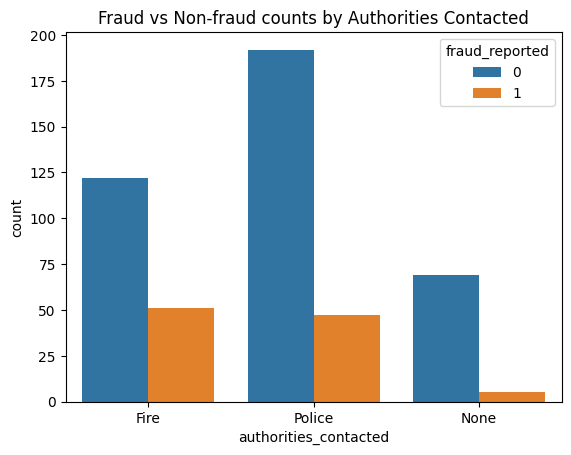

In [11]:
# Create a melted DataFrame for plotting
authorities_df = df_auth[['fraud_reported', 'authorities_contacted_Fire', 'authorities_contacted_Police', 'authorities_contacted_None']].copy()

authorities_df_melted = authorities_df.melt(id_vars='fraud_reported',
                                             var_name='authorities_contacted',
                                             value_name='contacted')

#print(authorities_df_melted.head())

authorities_df_melted = authorities_df_melted[authorities_df_melted['contacted'] == True]

# Rename the columns for better readability in the plot
authorities_df_melted['authorities_contacted'] = authorities_df_melted['authorities_contacted'].str.replace('authorities_contacted_', '')


sns.countplot(data=authorities_df_melted, x='authorities_contacted', hue='fraud_reported')
plt.title("Fraud vs Non-fraud counts by Authorities Contacted")
plt.show()

police_report_available_YES
False    686
True     314
Name: count, dtype: int64
police_report_available_NO
False    657
True     343
Name: count, dtype: int64
--------------------------------------
fraud_reported
0    242
1     72
Name: count, dtype: int64
fraud_reported
0    257
1     86
Name: count, dtype: int64
--------------------------------------


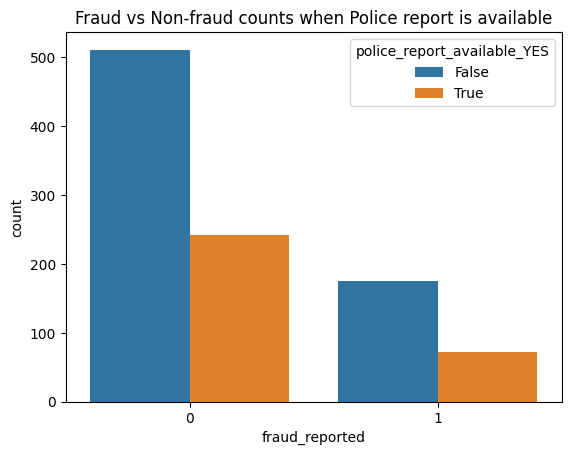

In [12]:
print(df['police_report_available_YES'].value_counts(dropna=False))
print(df['police_report_available_NO'].value_counts(dropna=False))
print("--------------------------------------")
print(df[df['police_report_available_YES']==True]['fraud_reported'].value_counts())
print(df[df['police_report_available_NO']==True]['fraud_reported'].value_counts())
print("--------------------------------------")
sns.countplot(data=df, x='fraud_reported', hue='police_report_available_YES')
plt.title("Fraud vs Non-fraud counts when Police report is available")
plt.show()

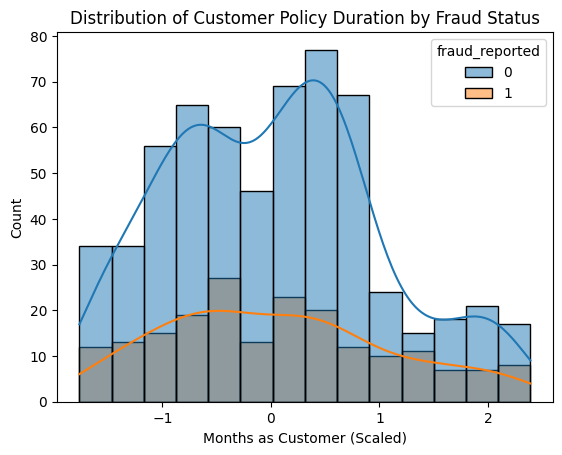

--------------------------------------
fraud_reported
0    93
1    35
Name: count, dtype: int64
fraud_reported
0    0.726562
1    0.273438
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    198
1     64
Name: count, dtype: int64
fraud_reported
0    0.755725
1    0.244275
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    223
1     60
Name: count, dtype: int64
fraud_reported
0    0.787986
1    0.212014
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    64
1    25
Name: count, dtype: int64
fraud_reported
0    0.719101
1    0.280899
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    25
1    13
Name: count, dtype: int64
fraud_reported
0    0.657895
1    0.342105
Name: proportion, dtype: float64


In [13]:
#plot distribution curves for months_as_customer by fraud status
sns.histplot(x=x_train['months_as_customer'], hue=y_train, kde=True)
plt.title("Distribution of Customer Policy Duration by Fraud Status")
plt.xlabel("Months as Customer (Scaled)")
plt.ylabel("Count")
plt.show()

#find the number of fraud cases in each bin of months_as_customer
lower_bound = -2
upper_bound = -1

for lower_bound in range(-2, 3):
  fraud_in_bin = pd.DataFrame()
  #join xtrain and ytrain dataset together for this analysis
  fraud_in_bin['months_as_customer'] = x_train['months_as_customer']
  fraud_in_bin['fraud_reported'] = y_train
  fraud_in_bin = fraud_in_bin[(fraud_in_bin['months_as_customer'] > lower_bound) &
                    (fraud_in_bin['months_as_customer'] < upper_bound)]
  print("--------------------------------------")
  print(fraud_in_bin['fraud_reported'].value_counts())
  print(fraud_in_bin['fraud_reported'].value_counts(normalize=True))
  upper_bound += 1

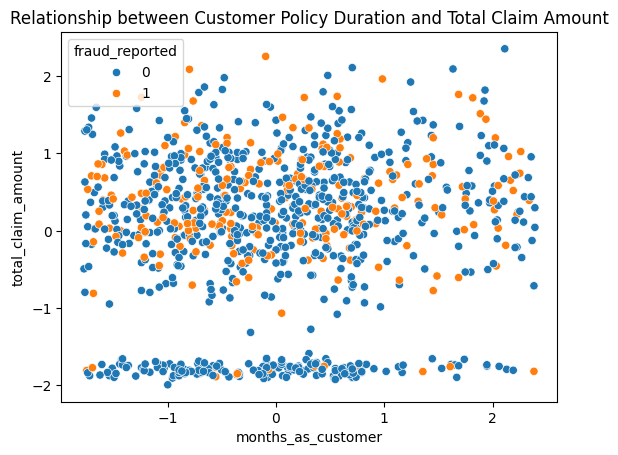

In [14]:
#plot the relationship between number of fraud cases and month_as_customers and total_claim_amount
sns.scatterplot(data=df, x='months_as_customer', y='total_claim_amount', hue='fraud_reported')
plt.title("Relationship between Customer Policy Duration and Total Claim Amount")
plt.show()

###Resampling with SMOTE

In [15]:
# SMOTE using df_original based on fraud/non-fraud counts
from imblearn.over_sampling import SMOTE

#df_smote = df.copy()
#x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(df_smote.drop('fraud_reported', axis=1), df_smote['fraud_reported'], test_size=0.2, random_state=4263)

smote = SMOTE(sampling_strategy='minority', random_state=4263)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print(x_train_resampled.shape)
print(y_train_resampled.shape)



(1206, 126)
(1206,)


fraud_reported
0    603
1    603
Name: count, dtype: int64


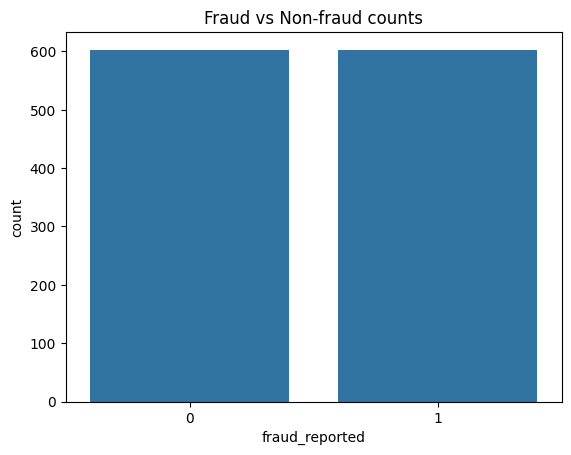

In [16]:
print(y_train_resampled.value_counts())

sns.countplot(data=pd.DataFrame(y_train_resampled), x='fraud_reported')
plt.title("Fraud vs Non-fraud counts")
plt.show()

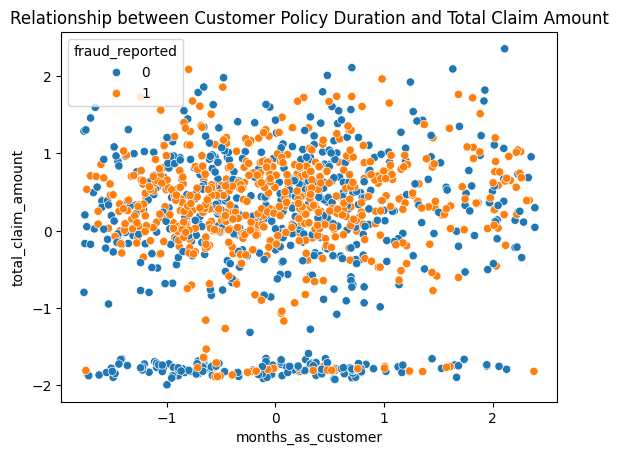

In [17]:
#plot the relationship between number of fraud cases and month_as_customers and total_claim_amount for the new smote dataset
sns.scatterplot(data=pd.DataFrame(x_train_resampled), x='months_as_customer', y='total_claim_amount', hue=pd.DataFrame(y_train_resampled)['fraud_reported'])
plt.title("Relationship between Customer Policy Duration and Total Claim Amount")
plt.show()



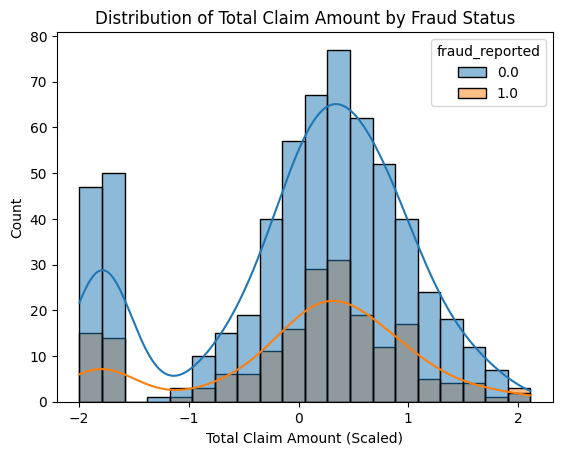

In [18]:
#plot distribution curves for total_claim_amount for fraud and non-fraud cases
sns.histplot(x=x_train_resampled['total_claim_amount'], hue=y_train, kde=True)
plt.title("Distribution of Total Claim Amount by Fraud Status")
plt.xlabel("Total Claim Amount (Scaled)")
plt.ylabel("Count")
plt.show()

In [19]:
#find the number of fraud cases in each bin of total_claim_amount
lower_bound = -2
upper_bound = -1

print("Number of fraud cases for each bin of total_claim_amount after SMOTE")
for lower_bound in range(-2, 3):
  fraud_in_bin = pd.DataFrame()
  #join xtrain and ytrain dataset together for this analysis
  fraud_in_bin['total_claim_amount'] = x_train_resampled['total_claim_amount']
  fraud_in_bin['fraud_reported'] = y_train_resampled
  fraud_in_bin = fraud_in_bin[(fraud_in_bin['total_claim_amount'] > lower_bound) &
                    (fraud_in_bin['total_claim_amount'] < upper_bound)]
  print("--------------------------------------")
  print(fraud_in_bin['fraud_reported'].value_counts())
  print(fraud_in_bin['fraud_reported'].value_counts(normalize=True))
  upper_bound += 1


#print(fraud_in_bin['fraud_reported'].value_counts())
#print(fraud_in_bin['fraud_reported'].value_counts(normalize=True))



Number of fraud cases for each bin of total_claim_amount after SMOTE
--------------------------------------
fraud_reported
0    137
1     42
Name: count, dtype: int64
fraud_reported
0    0.765363
1    0.234637
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    127
1    101
Name: count, dtype: int64
fraud_reported
0    0.557018
1    0.442982
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
1    394
0    265
Name: count, dtype: int64
fraud_reported
1    0.597876
0    0.402124
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    70
1    65
Name: count, dtype: int64
fraud_reported
0    0.518519
1    0.481481
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    4
1    1
Name: count, dtype: int64
fraud_reported
0    0.8
1    0.2
Name: proportion, dtype: float64


In [20]:
#count all the different authorities counted

df_auth = pd.DataFrame()
df_auth['authorities_contacted_Fire'] = x_train_resampled['authorities_contacted_Fire']
df_auth['authorities_contacted_Police'] = x_train_resampled['authorities_contacted_Police']
df_auth['authorities_contacted_Other'] = x_train_resampled['authorities_contacted_Other']
df_auth['authorities_contacted_None'] = x_train_resampled['authorities_contacted_None']
df_auth['fraud_reported'] = y_train_resampled
print("--------------------------------------")
print(df_auth['authorities_contacted_Fire'].value_counts())
print(df_auth['authorities_contacted_Police'].value_counts())
print(df_auth['authorities_contacted_Other'].value_counts())
print(df_auth['authorities_contacted_None'].value_counts())
print("--------------------------------------")
#check when the fire/police/no authorities were contacted, which of those cases were fraud/not fraud
print(df_auth[df_auth['authorities_contacted_Fire'] == 1]['fraud_reported'].value_counts())
print(df_auth[df_auth['authorities_contacted_Police'] == 1]['fraud_reported'].value_counts())
print(df_auth[df_auth['authorities_contacted_None'] == 1]['fraud_reported'].value_counts())

--------------------------------------
authorities_contacted_Fire
False    823
True     383
Name: count, dtype: int64
authorities_contacted_Police
False    818
True     388
Name: count, dtype: int64
authorities_contacted_Other
False    883
True     323
Name: count, dtype: int64
authorities_contacted_None
False    1119
True       87
Name: count, dtype: int64
--------------------------------------
fraud_reported
1    261
0    122
Name: count, dtype: int64
fraud_reported
1    196
0    192
Name: count, dtype: int64
fraud_reported
0    69
1    18
Name: count, dtype: int64


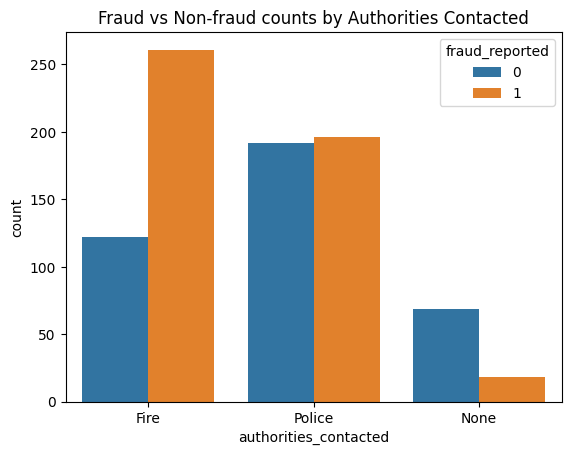

In [21]:
# Create a melted DataFrame for plotting
authorities_df = df_auth[['fraud_reported', 'authorities_contacted_Fire', 'authorities_contacted_Police', 'authorities_contacted_None']].copy()

authorities_df_melted = authorities_df.melt(id_vars='fraud_reported',
                                             var_name='authorities_contacted',
                                             value_name='contacted')

#print(authorities_df_melted.head())

authorities_df_melted = authorities_df_melted[authorities_df_melted['contacted'] == True]

# Rename the columns for better readability in the plot
authorities_df_melted['authorities_contacted'] = authorities_df_melted['authorities_contacted'].str.replace('authorities_contacted_', '')


sns.countplot(data=authorities_df_melted, x='authorities_contacted', hue='fraud_reported')
plt.title("Fraud vs Non-fraud counts by Authorities Contacted")
plt.show()

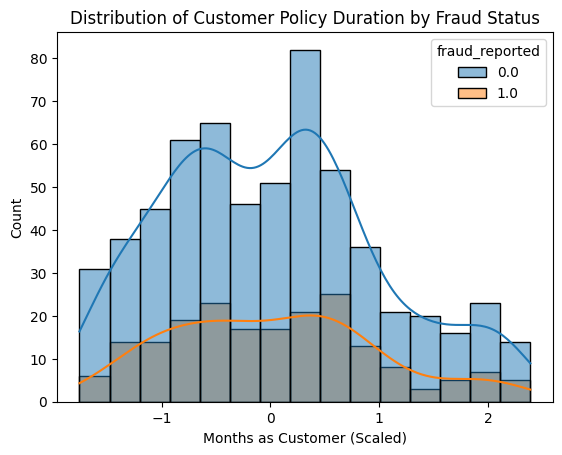

--------------------------------------
fraud_reported
0    93
1    78
Name: count, dtype: int64
fraud_reported
0    0.54386
1    0.45614
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
1    234
0    198
Name: count, dtype: int64
fraud_reported
1    0.541667
0    0.458333
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    223
1    193
Name: count, dtype: int64
fraud_reported
0    0.536058
1    0.463942
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
1    71
0    64
Name: count, dtype: int64
fraud_reported
1    0.525926
0    0.474074
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
1    27
0    25
Name: count, dtype: int64
fraud_reported
1    0.519231
0    0.480769
Name: proportion, dtype: float64


In [22]:
#plot distribution curves for months_as_customer by fraud status
sns.histplot(x=x_train_resampled['months_as_customer'], hue=y_train, kde=True)
plt.title("Distribution of Customer Policy Duration by Fraud Status")
plt.xlabel("Months as Customer (Scaled)")
plt.ylabel("Count")
plt.show()

#find the number of fraud cases in each bin of months_as_customer
lower_bound = -2
upper_bound = -1

for lower_bound in range(-2, 3):
  fraud_in_bin = pd.DataFrame()
  #join xtrain and ytrain dataset together for this analysis
  fraud_in_bin['months_as_customer'] = x_train_resampled['months_as_customer']
  fraud_in_bin['fraud_reported'] = y_train_resampled
  fraud_in_bin = fraud_in_bin[(fraud_in_bin['months_as_customer'] > lower_bound) &
                    (fraud_in_bin['months_as_customer'] < upper_bound)]
  print("--------------------------------------")
  print(fraud_in_bin['fraud_reported'].value_counts())
  print(fraud_in_bin['fraud_reported'].value_counts(normalize=True))
  upper_bound += 1

###Resampling with ADASYN


In [23]:
# ADASYN using df_original based on fraud/non-fraud counts
from imblearn.over_sampling import ADASYN

#df_adasyn = df.copy()
#x_train_adasyn, x_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(df_adasyn.drop('fraud_reported', axis=1), df_adasyn['fraud_reported'], test_size=0.2, random_state=4263)

adasyn = ADASYN(sampling_strategy='minority', random_state=4263)
x_train_resampled_adasyn, y_train_resampled_adasyn = adasyn.fit_resample(x_train, y_train)

print(x_train_resampled_adasyn.shape)
print(y_train_resampled_adasyn.shape)

(1203, 126)
(1203,)


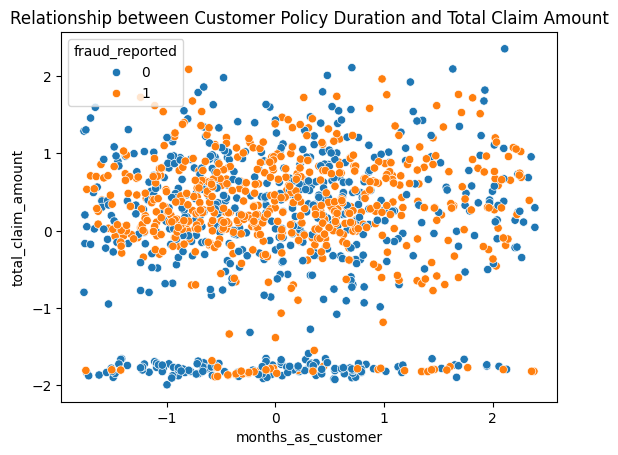

In [24]:
#plot the relationship between number of fraud cases and month_as_customers and total_claim_amount for the new adasyn dataset
sns.scatterplot(data=pd.DataFrame(x_train_resampled_adasyn), x='months_as_customer', y='total_claim_amount', hue=pd.DataFrame(y_train_resampled)['fraud_reported'])
plt.title("Relationship between Customer Policy Duration and Total Claim Amount")
plt.show()


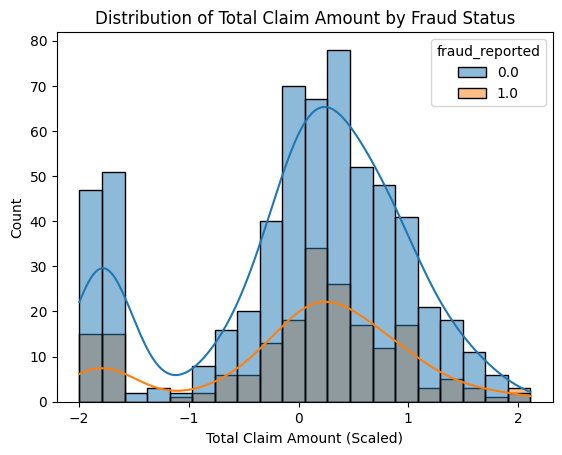

In [25]:
#plot distribution curves for total_claim_amount for fraud and non-fraud cases
sns.histplot(x=x_train_resampled_adasyn['total_claim_amount'], hue=y_train, kde=True)
plt.title("Distribution of Total Claim Amount by Fraud Status")
plt.xlabel("Total Claim Amount (Scaled)")
plt.ylabel("Count")
plt.show()

In [26]:
#find the number of fraud cases in each bin of total_claim_amount
lower_bound = -2
upper_bound = -1
print("Number of fraud cases for each bin of total_claim_amount after ADASYN")
for lower_bound in range(-2, 3):
  fraud_in_bin = pd.DataFrame()
  #join xtrain and ytrain dataset together for this analysis
  fraud_in_bin['total_claim_amount'] = x_train_resampled_adasyn['total_claim_amount']
  fraud_in_bin['fraud_reported'] = y_train_resampled_adasyn
  fraud_in_bin = fraud_in_bin[(fraud_in_bin['total_claim_amount'] > lower_bound) &
                    (fraud_in_bin['total_claim_amount'] < upper_bound)]
  print("--------------------------------------")
  print(fraud_in_bin['fraud_reported'].value_counts())
  print(fraud_in_bin['fraud_reported'].value_counts(normalize=True))
  upper_bound += 1


#print(fraud_in_bin['fraud_reported'].value_counts())
#print(fraud_in_bin['fraud_reported'].value_counts(normalize=True))



Number of fraud cases for each bin of total_claim_amount after ADASYN
--------------------------------------
fraud_reported
0    137
1     48
Name: count, dtype: int64
fraud_reported
0    0.740541
1    0.259459
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    127
1    112
Name: count, dtype: int64
fraud_reported
0    0.531381
1    0.468619
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
1    378
0    265
Name: count, dtype: int64
fraud_reported
1    0.587869
0    0.412131
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    70
1    61
Name: count, dtype: int64
fraud_reported
0    0.534351
1    0.465649
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    4
1    1
Name: count, dtype: int64
fraud_reported
0    0.8
1    0.2
Name: proportion, dtype: float64


In [27]:
#count all the different authorities counted
df_auth = pd.DataFrame()
df_auth['authorities_contacted_Fire'] = x_train_resampled_adasyn['authorities_contacted_Fire']
df_auth['authorities_contacted_Police'] = x_train_resampled_adasyn['authorities_contacted_Police']
df_auth['authorities_contacted_Other'] = x_train_resampled_adasyn['authorities_contacted_Other']
df_auth['authorities_contacted_None'] = x_train_resampled_adasyn['authorities_contacted_None']
df_auth['fraud_reported'] = y_train_resampled_adasyn
print("--------------------------------------")
print(df_auth['authorities_contacted_Fire'].value_counts())
print(df_auth['authorities_contacted_Police'].value_counts())
print(df_auth['authorities_contacted_Other'].value_counts())
print(df_auth['authorities_contacted_None'].value_counts())
print("--------------------------------------")
#check when the fire/police/no authorities were contacted, which of those cases were fraud/not fraud
print(df_auth[df_auth['authorities_contacted_Fire'] == 1]['fraud_reported'].value_counts())
print(df_auth[df_auth['authorities_contacted_Police'] == 1]['fraud_reported'].value_counts())
print(df_auth[df_auth['authorities_contacted_None'] == 1]['fraud_reported'].value_counts())

--------------------------------------
authorities_contacted_Fire
False    859
True     344
Name: count, dtype: int64
authorities_contacted_Police
False    799
True     404
Name: count, dtype: int64
authorities_contacted_Other
False    876
True     327
Name: count, dtype: int64
authorities_contacted_None
False    1104
True       99
Name: count, dtype: int64
--------------------------------------
fraud_reported
1    222
0    122
Name: count, dtype: int64
fraud_reported
1    212
0    192
Name: count, dtype: int64
fraud_reported
0    69
1    30
Name: count, dtype: int64


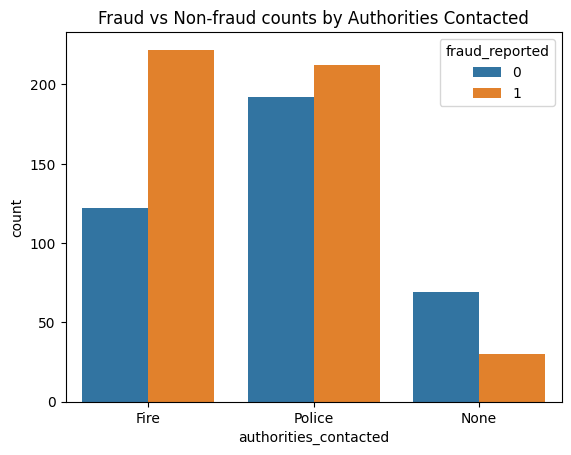

In [28]:
# Create a melted DataFrame for plotting
authorities_df = df_auth[['fraud_reported', 'authorities_contacted_Fire', 'authorities_contacted_Police', 'authorities_contacted_None']].copy()

authorities_df_melted = authorities_df.melt(id_vars='fraud_reported',
                                             var_name='authorities_contacted',
                                             value_name='contacted')

#print(authorities_df_melted.head())

authorities_df_melted = authorities_df_melted[authorities_df_melted['contacted'] == True]

# Rename the columns for better readability in the plot
authorities_df_melted['authorities_contacted'] = authorities_df_melted['authorities_contacted'].str.replace('authorities_contacted_', '')


sns.countplot(data=authorities_df_melted, x='authorities_contacted', hue='fraud_reported')
plt.title("Fraud vs Non-fraud counts by Authorities Contacted")
plt.show()

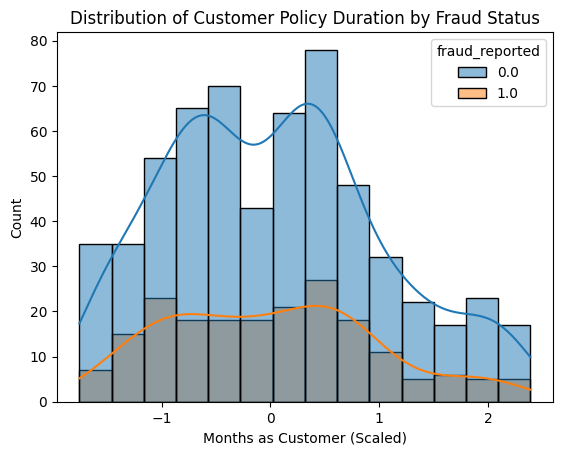

--------------------------------------
fraud_reported
0    93
1    87
Name: count, dtype: int64
fraud_reported
0    0.516667
1    0.483333
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
1    220
0    198
Name: count, dtype: int64
fraud_reported
1    0.526316
0    0.473684
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
0    223
1    181
Name: count, dtype: int64
fraud_reported
0    0.55198
1    0.44802
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
1    85
0    64
Name: count, dtype: int64
fraud_reported
1    0.57047
0    0.42953
Name: proportion, dtype: float64
--------------------------------------
fraud_reported
1    27
0    25
Name: count, dtype: int64
fraud_reported
1    0.519231
0    0.480769
Name: proportion, dtype: float64


In [35]:
#plot distribution curves for months_as_customer by fraud status
sns.histplot(x=x_train_resampled_adasyn['months_as_customer'], hue=y_train, kde=True)
plt.title("Distribution of Customer Policy Duration by Fraud Status")
plt.xlabel("Months as Customer (Scaled)")
plt.ylabel("Count")
plt.show()

#find the number of fraud cases in each bin of months_as_customer
lower_bound = -2
upper_bound = -1

for lower_bound in range(-2, 3):
  fraud_in_bin = pd.DataFrame()
  #join xtrain and ytrain dataset together for this analysis
  fraud_in_bin['months_as_customer'] = x_train_resampled_adasyn['months_as_customer']
  fraud_in_bin['fraud_reported'] = y_train_resampled_adasyn
  fraud_in_bin = fraud_in_bin[(fraud_in_bin['months_as_customer'] > lower_bound) &
                    (fraud_in_bin['months_as_customer'] < upper_bound)]
  print("--------------------------------------")
  print(fraud_in_bin['fraud_reported'].value_counts())
  print(fraud_in_bin['fraud_reported'].value_counts(normalize=True))
  upper_bound += 1

### Oversampling for a specific ratio: 60:40

We will oversample the minority class (fraud) to achieve a specific ratio of non-fraud to fraud cases (60% non-fraud, 40% fraud).

Original class distribution: Counter({0: 603, 1: 197})
Target sampling strategy for step 1 (oversampling): {0: 603, 1: 402}

Shape after oversampling: (1005, 126)
Value counts after oversampling: Counter({0: 603, 1: 402})


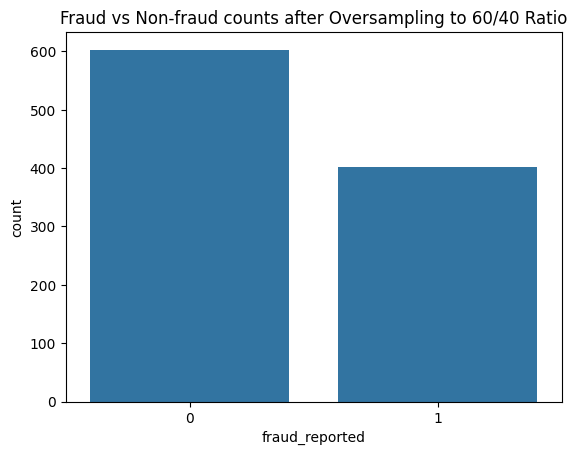

In [30]:
# Get the original class distribution of the training data
original_class_counts = Counter(y_train)
print("Original class distribution:", original_class_counts)

# Calculate the target number of samples for each class
total_samples = len(y_train)
target_fraud_samples = int(total_samples * 0.40 / 0.60 * original_class_counts[0] / original_class_counts[0]) # calculate based on the proportion of fraud cases needed
target_non_fraud_samples = int(total_samples * 0.60 / 0.40 * original_class_counts[1] / original_class_counts[1]) # calculate based on the proportion of non-fraud cases needed


# 60-40 split on dataset
target_fraud_samples_step1 = int((original_class_counts[0] / 0.60) * 0.40)
target_non_fraud_samples_step1 = original_class_counts[0]

sampling_strategy_step1 = {0: target_non_fraud_samples_step1, 1: target_fraud_samples_step1}
print("Target sampling strategy for step 1 (oversampling):", sampling_strategy_step1)


smote = SMOTE(sampling_strategy=sampling_strategy_step1, random_state=4263)
x_train_oversampled_ratio, y_train_oversampled_ratio = smote.fit_resample(x_train, y_train)

print("\nShape after oversampling:", x_train_oversampled_ratio.shape)
print("Value counts after oversampling:", Counter(y_train_oversampled_ratio))

# Plot the distribution after oversampling
sns.countplot(data=pd.DataFrame(y_train_oversampled_ratio), x='fraud_reported')
plt.title("Fraud vs Non-fraud counts after Oversampling to 60/40 Ratio")
plt.show()

#Class Weight

We will add class weight to original dataset and 60-40 Oversample dataset

In [31]:
# Calculate class weights for Original Dataset
class_weights_original = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict_original = dict(zip(np.unique(y_train), class_weights_original))

# Calculate class weights for Oversample Dataset (60-40)
class_weights_6040 = compute_class_weight('balanced', classes=np.unique(y_train_oversampled_ratio), y=y_train_oversampled_ratio)
class_weight_dict_6040 = dict(zip(np.unique(y_train_oversampled_ratio), class_weights_6040))

print("Class weights (Original):", class_weight_dict_original)
print("Class weights (60-40):", class_weight_dict_6040)




Class weights (Original): {np.int64(0): np.float64(0.6633499170812603), np.int64(1): np.float64(2.030456852791878)}
Class weights (60-40): {np.int64(0): np.float64(0.8333333333333334), np.int64(1): np.float64(1.25)}


# 4 Datasets
- Original after cleaning (75-25)
- Smote dataset (50-50)
- Adasyn dataset (50-50)
- Oversample dataset (60-40)


In [32]:
# 5 sets of datasets (Including test dataset)
df_x = pd.DataFrame(x_train) #original after cleaning
df_y = pd.DataFrame(y_train)
df_toexport = pd.concat([df_x, df_y], axis=1)

df_smote_x = pd.DataFrame(x_train_resampled) #smote
df_smote_y = pd.DataFrame(y_train_resampled)
df_smote = pd.concat([df_smote_x, df_smote_y], axis=1)

df_adasyn_x = pd.DataFrame(x_train_resampled_adasyn) #adasyn
df_adasyn_y = pd.DataFrame(y_train_resampled_adasyn)
df_adasyn = pd.concat([df_adasyn_x, df_adasyn_y], axis=1)

df_oversampled_x = pd.DataFrame(x_train_oversampled_ratio) #60-40
df_oversampled_y = pd.DataFrame(y_train_oversampled_ratio)
df_oversampled = pd.concat([df_oversampled_x, df_oversampled_y], axis=1)

df_xtest = pd.DataFrame(x_test)
df_ytest = pd.DataFrame(y_test)
df_test = pd.concat([df_xtest, df_ytest], axis=1)

# Models (6 in total)
models = {
    "Original": (x_train, y_train, x_test, y_test, None),
    "SMOTE": (x_train_resampled, y_train_resampled, x_test, y_test, None),
    "ADASYN": (x_train_resampled_adasyn, y_train_resampled_adasyn, x_test, y_test, None),
    "60-40": (x_train_oversampled_ratio, y_train_oversampled_ratio, x_test, y_test, None),
    "Original + Weight": (x_train, y_train, x_test, y_test, class_weight_dict_original),
    "60-40 + Weight": (x_train_oversampled_ratio, y_train_oversampled_ratio, x_test, y_test, class_weight_dict_6040),
}


# export the 5 datasets
#output_dir = '/content/drive/MyDrive/DSA4263/'
#df_toexport.to_csv(f'{output_dir}original_cleaned_dataset.csv', index=False)
#df_smote.to_csv(f'{output_dir}smote_dataset.csv', index=False)
#df_adasyn.to_csv(f'{output_dir}adasyn_dataset.csv', index=False)
#df_oversampled.to_csv(f'{output_dir}oversampled_dataset.csv', index=False)
#df_test.to_csv(f'{output_dir}test_dataset.csv', index=False)




# Feature Importance


In [33]:
# Feature Importance using RandomForest
feature_names = x_train.columns
feature_importances = {}

for name, (X_train_i, y_train_i, X_test_i, y_test_i, cw) in models.items():
    print(f"\nTraining model: {name}")

    if cw is not None:
        model = RandomForestClassifier(class_weight=cw, random_state=4263)
    else:
        model = RandomForestClassifier(random_state=4263)

    model.fit(X_train_i, y_train_i)

    # Get feature importance
    importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
    feature_importances[name] = importances

# --- Display top 10 features for each ---
for name, importances in feature_importances.items():
    print(f"\nTop 10 important features ({name}):")
    print(importances.head(10))



Training model: Original

Training model: SMOTE

Training model: ADASYN

Training model: 60-40

Training model: Original + Weight

Training model: 60-40 + Weight

Top 10 important features (Original):
incident_severity_Major Damage    0.098190
insured_zip                       0.044006
property_claim                    0.040813
injury_claim                      0.038470
policy_annual_premium             0.036166
months_as_customer                0.035931
total_claim_amount                0.035815
age                               0.030660
incident_hour_of_the_day          0.028158
auto_year                         0.025823
dtype: float64

Top 10 important features (SMOTE):
incident_severity_Major Damage    0.155913
insured_zip                       0.040371
total_claim_amount                0.034622
property_claim                    0.033669
insured_hobbies_Games             0.032236
collision_type_Rear Collision     0.028330
injury_claim                      0.027104
months_as_custom

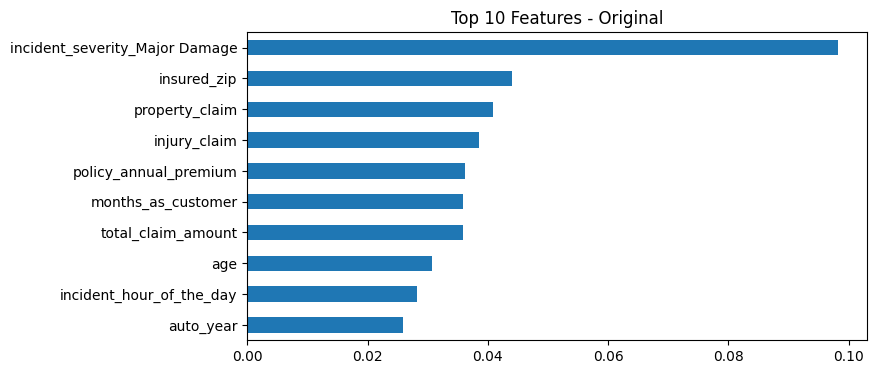

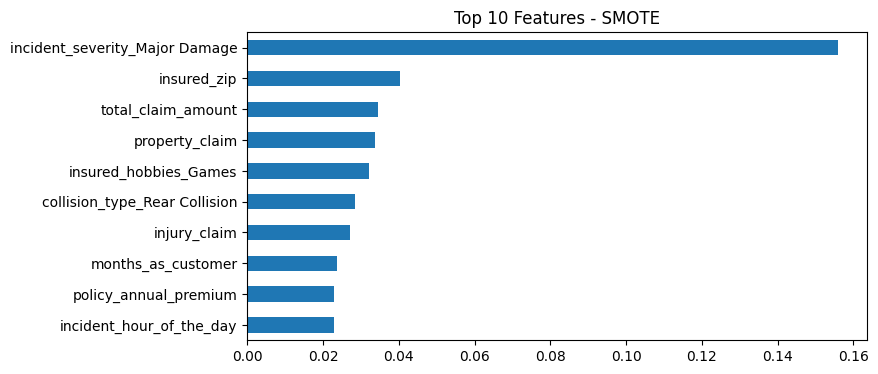

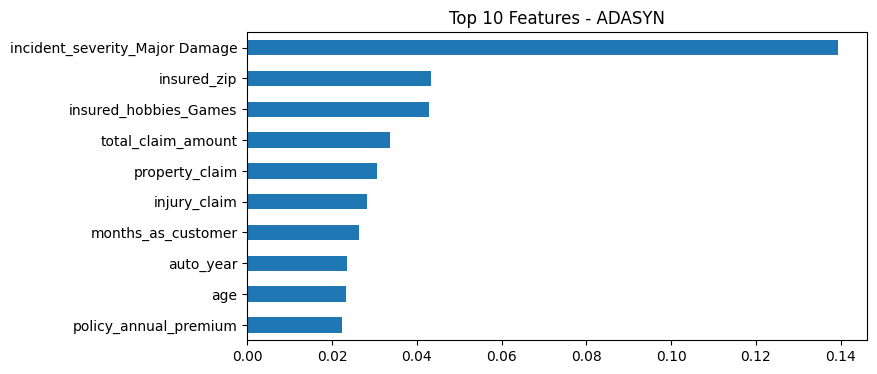

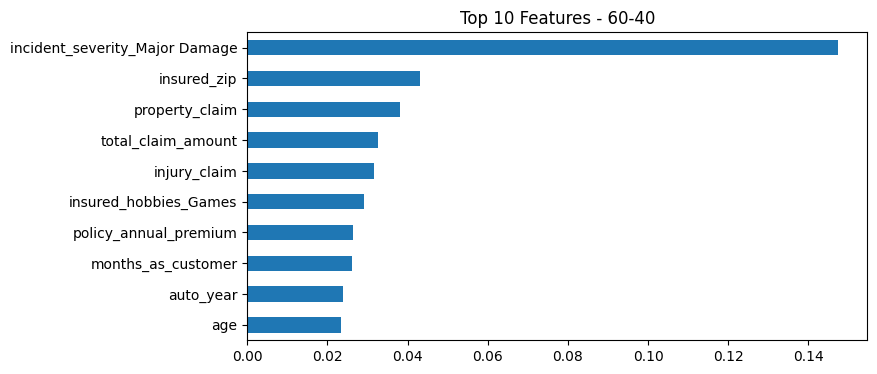

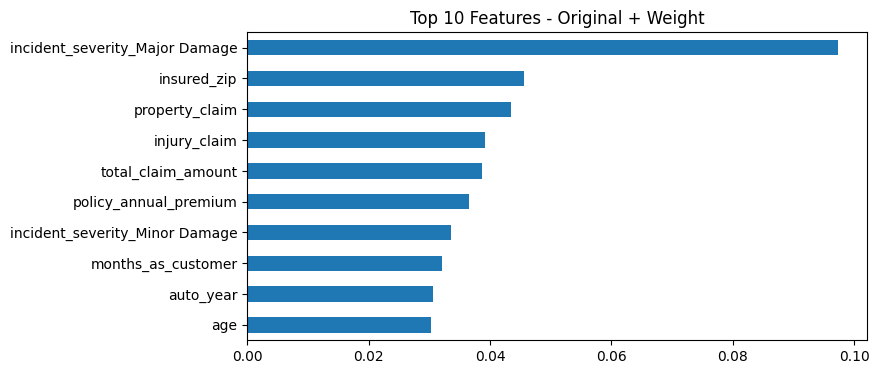

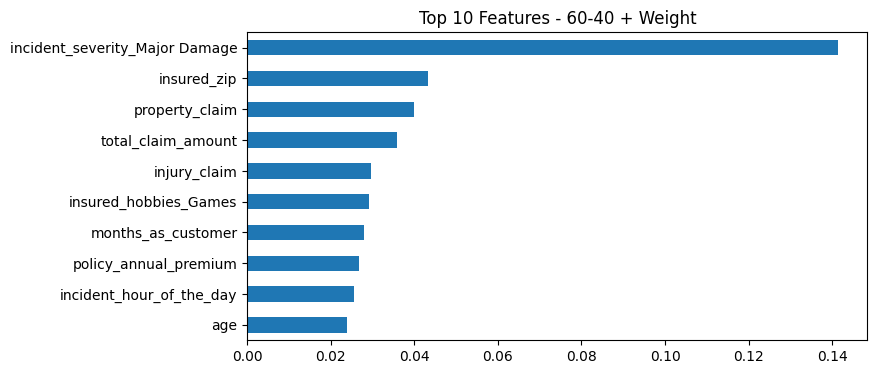

In [34]:
import matplotlib.pyplot as plt

top_n = 10
for name, importances in feature_importances.items():
    plt.figure(figsize=(8,4))
    importances.head(top_n).plot(kind='barh', title=f"Top {top_n} Features - {name}")
    plt.gca().invert_yaxis()
    plt.show()
